   # Analysis for car data set

In [368]:
#Import Libraries/Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df=pd.read_csv("CarPrice.csv")

In [159]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# data understanding

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [160]:
# Obtain the description of the dataframe
df.drop('car_ID', axis=1).describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [161]:
##checking the null values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**There is no null value in data.**

In [162]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [163]:
#let us see which columns have num featrue
num_col=df.select_dtypes(include=[np.number])
num_col.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [164]:
# categorical varible
cate_col=df.select_dtypes(include=[np.object])
cate_col.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [169]:
#checking the categorical features
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [55]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [170]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [171]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [172]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [173]:
df['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [174]:
df['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [175]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [176]:
df['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

# EDA

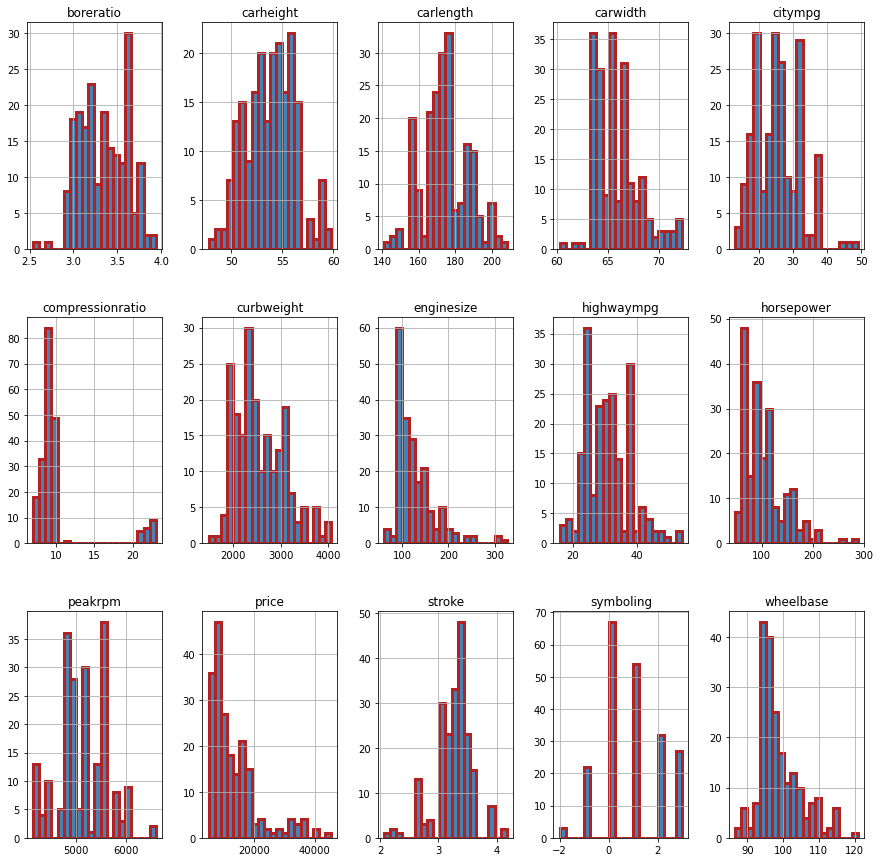

In [64]:
# Histogram for each continuous variable
num_col.drop('car_ID', axis=1).hist(figsize=(15, 15), bins=20, layout=(3, 5), color='steelblue',
                                   edgecolor='firebrick', linewidth=3);

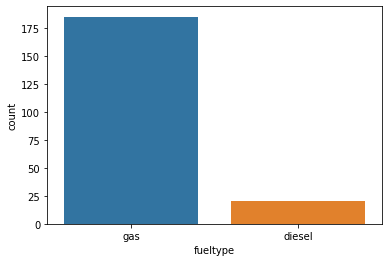

In [97]:
sns.countplot('fueltype',data=df)

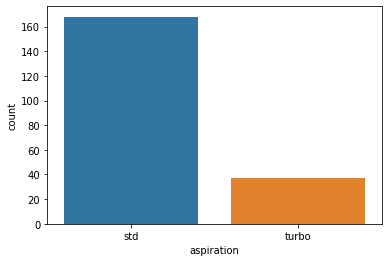

In [98]:
sns.countplot('aspiration',data=df)

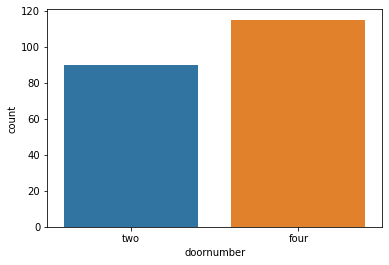

In [99]:
sns.countplot('doornumber',data=df)

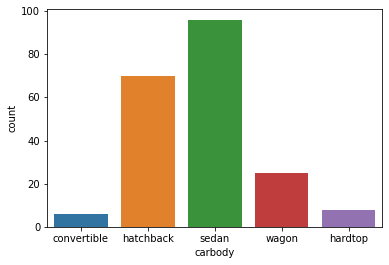

In [100]:
sns.countplot('carbody',data=df)

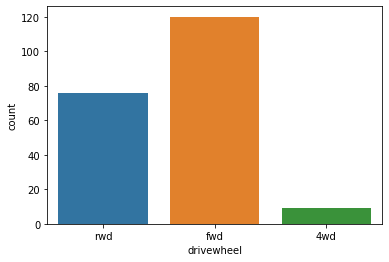

In [101]:
sns.countplot('drivewheel',data=df)

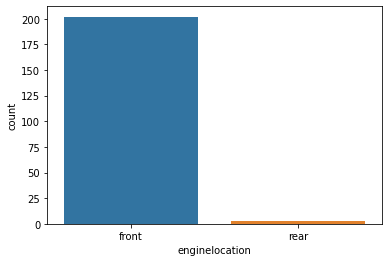

In [102]:
sns.countplot('enginelocation',data=df)

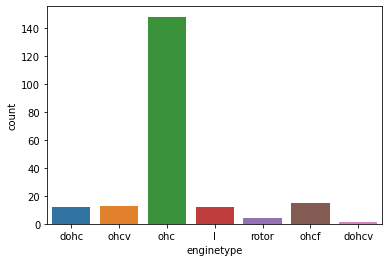

In [103]:
sns.countplot('enginetype',data=df)

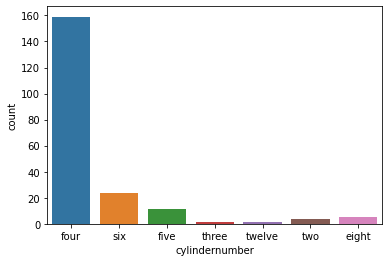

In [104]:
sns.countplot('cylindernumber',data=df)

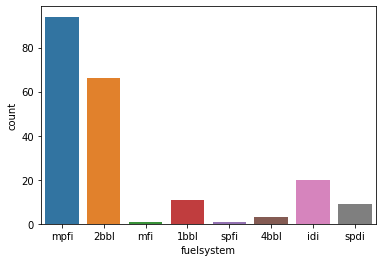

In [105]:
sns.countplot('fuelsystem',data=df)

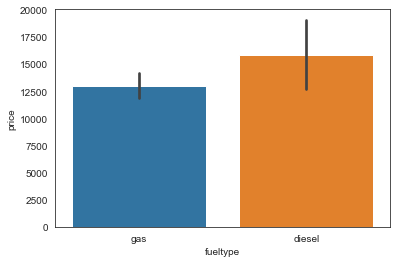

In [118]:
sns.barplot(data=df, x='fueltype', y='price');

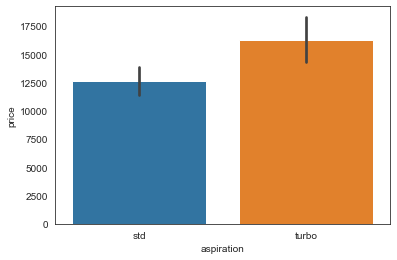

In [119]:
sns.barplot(data=df, x='aspiration', y='price');

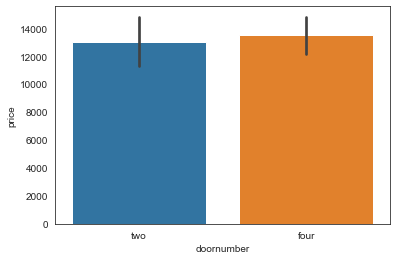

In [120]:
sns.barplot(data=df, x='doornumber', y='price');

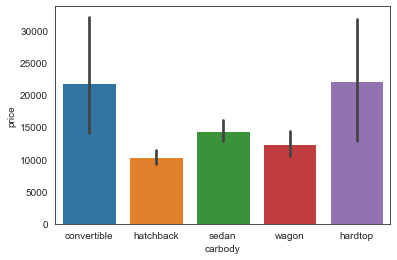

In [121]:
sns.barplot(data=df,x='carbody',y='price' )

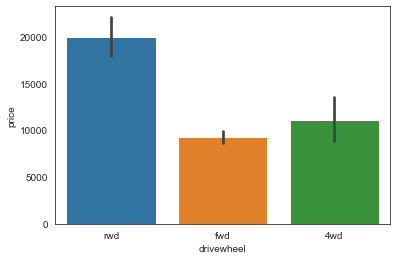

In [122]:
sns.barplot(data=df,x='drivewheel',y='price' )

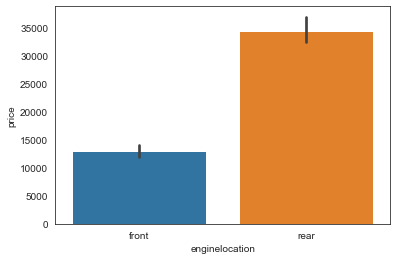

In [123]:
sns.barplot(data=df,x='enginelocation',y='price' )

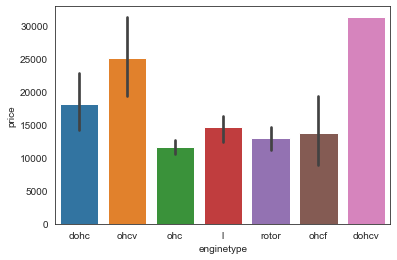

In [124]:
sns.barplot(data=df,x='enginetype',y='price')

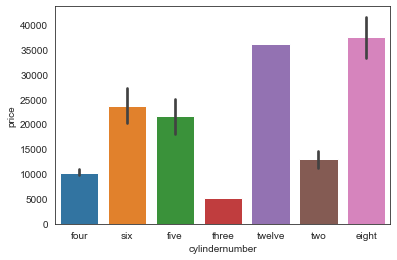

In [125]:
sns.barplot(data=df,x='cylindernumber',y='price')

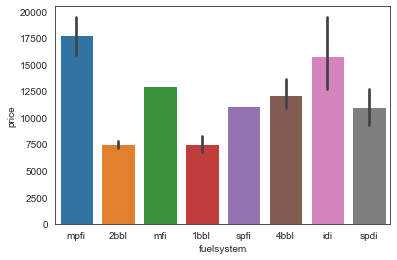

In [126]:
sns.barplot(data=df,x='fuelsystem',y='price')

In [84]:
#Droping the variable
df2 = df.copy()
df2.drop('car_ID', axis=1, inplace=True)

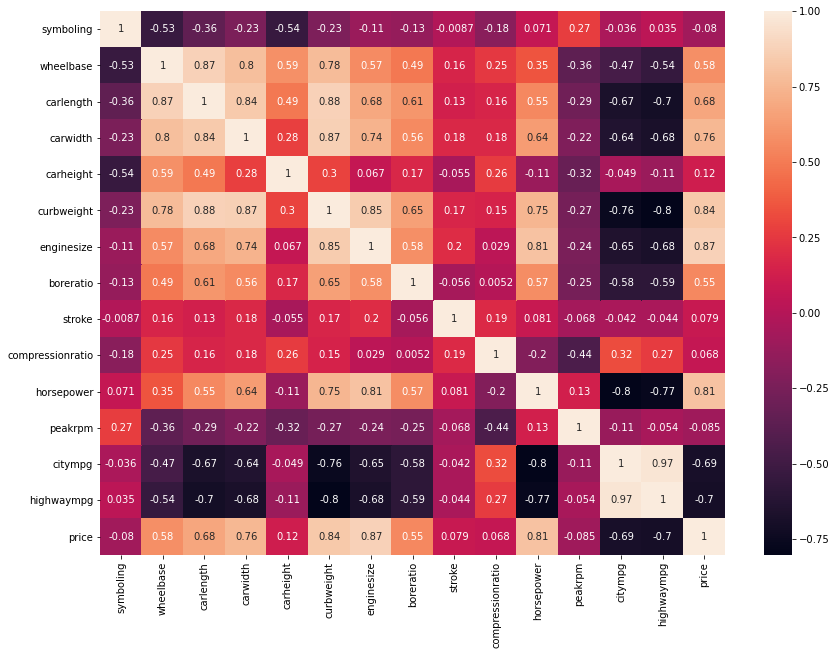

In [94]:
# Heatmap 
corr_plot = df2.corr()
fig, ax = plt.subplots(figsize = (14, 10))
sns.heatmap(corr_plot, annot=True)

See here this are the varibles **'carlength','carwidth','curbweight','enginesize','horsepower'** are highly correlated to price and this are the varibles are **'citympg','highwaympg'** negative correlated to the price.

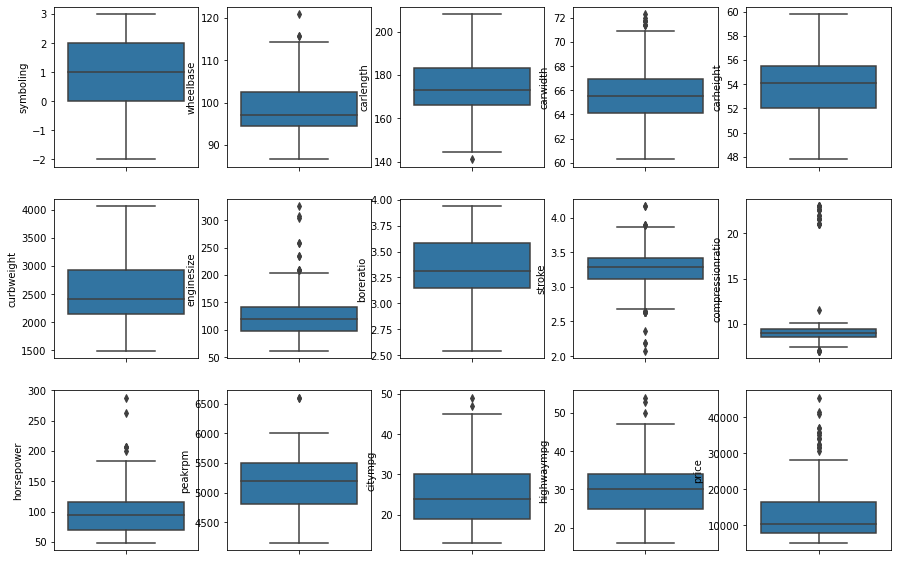

In [86]:
# Boxplot to check the presence of outliers
fig, axes = plt.subplots(3, 5, figsize = (15, 10))
sns.boxplot(data = num_col, y = 'symboling', ax = axes[0,0])
sns.boxplot(data = num_col, y = 'wheelbase', ax = axes[0,1])
sns.boxplot(data = num_col, y = 'carlength', ax = axes[0,2])
sns.boxplot(data = num_col, y = 'carwidth', ax = axes[0,3])
sns.boxplot(data = num_col, y = 'carheight', ax = axes[0, 4])
sns.boxplot(data = num_col, y = 'curbweight', ax = axes[1,0])
sns.boxplot(data = num_col, y = 'enginesize', ax = axes[1,1])
sns.boxplot(data = num_col, y = 'boreratio', ax = axes[1,2])
sns.boxplot(data = num_col, y = 'stroke', ax = axes[1,3])
sns.boxplot(data = num_col, y = 'compressionratio', ax = axes[1,4])
sns.boxplot(data = num_col, y = 'horsepower', ax = axes[2,0])
sns.boxplot(data = num_col, y = 'peakrpm', ax = axes[2,1])
sns.boxplot(data = num_col, y = 'citympg', ax = axes[2,2])
sns.boxplot(data = num_col, y = 'highwaympg', ax = axes[2,3])
sns.boxplot(data = num_col, y = 'price', ax = axes[2,4]);

In this box plot we understand **'compressionratio','horsepower'** are affected by outliers, so we have to detect the outliers.

In [365]:
# Oultier Treatment with Inter-Quartile range scores(if you did outlizer detection for "compressionratio" 
#it will reduce the fueltype as one(['gas', 'diesel']) .it will problem in encoding time.

cols = ['horsepower'] 

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_new1 = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            199 non-null    int64  
 1   symboling         199 non-null    int64  
 2   CarName           199 non-null    object 
 3   fueltype          199 non-null    object 
 4   aspiration        199 non-null    object 
 5   doornumber        199 non-null    object 
 6   carbody           199 non-null    object 
 7   drivewheel        199 non-null    object 
 8   enginelocation    199 non-null    object 
 9   wheelbase         199 non-null    float64
 10  carlength         199 non-null    float64
 11  carwidth          199 non-null    float64
 12  carheight         199 non-null    float64
 13  curbweight        199 non-null    int64  
 14  enginetype        199 non-null    object 
 15  cylindernumber    199 non-null    object 
 16  enginesize        199 non-null    int64  
 1

**After perfomaing the 'Inter-Quartile range scores' we got (172,26)**

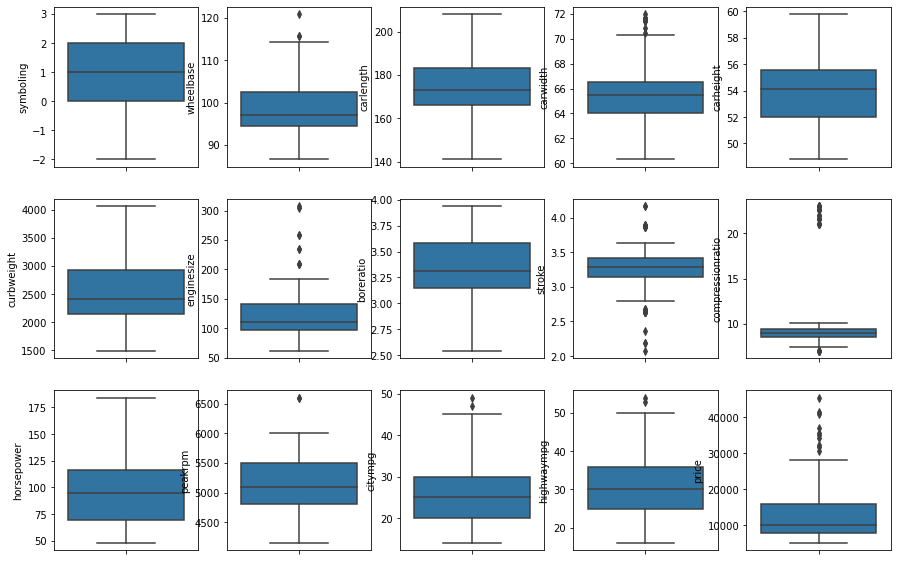

In [261]:
# Boxplot to check the presence of outliers
fig, axes = plt.subplots(3, 5, figsize = (15, 10))
sns.boxplot(data = df_new1, y = 'symboling', ax = axes[0,0])
sns.boxplot(data = df_new1, y = 'wheelbase', ax = axes[0,1])
sns.boxplot(data = df_new1, y = 'carlength', ax = axes[0,2])
sns.boxplot(data = df_new1, y = 'carwidth', ax = axes[0,3])
sns.boxplot(data = df_new1, y = 'carheight', ax = axes[0, 4])
sns.boxplot(data = df_new1, y = 'curbweight', ax = axes[1,0])
sns.boxplot(data = df_new1, y = 'enginesize', ax = axes[1,1])
sns.boxplot(data = df_new1, y = 'boreratio', ax = axes[1,2])
sns.boxplot(data = df_new1, y = 'stroke', ax = axes[1,3])
sns.boxplot(data = df_new1, y = 'compressionratio', ax = axes[1,4])
sns.boxplot(data = df_new1, y = 'horsepower', ax = axes[2,0])
sns.boxplot(data = df_new1, y = 'peakrpm', ax = axes[2,1])
sns.boxplot(data = df_new1, y = 'citympg', ax = axes[2,2])
sns.boxplot(data = df_new1, y = 'highwaympg', ax = axes[2,3])
sns.boxplot(data = df_new1, y = 'price', ax = axes[2,4]);

In [366]:
#Removing the car_id and Car_name
df_new1.drop(["car_ID","CarName"], axis=1, inplace=True)

df_new1.head()

C:\Users\2211575\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [263]:
df_new1['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [264]:
# new categorical varible
cate_col_new=df_new1.select_dtypes(include=[np.object])
cate_col_new.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [281]:
#dummy code the my categorical varible
dummy_cat_data = pd.get_dummies(df_new1,columns = [x for x in cate_col_new.columns],drop_first = True)
dummy_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             199 non-null    int64  
 1   wheelbase             199 non-null    float64
 2   carlength             199 non-null    float64
 3   carwidth              199 non-null    float64
 4   carheight             199 non-null    float64
 5   curbweight            199 non-null    int64  
 6   enginesize            199 non-null    int64  
 7   boreratio             199 non-null    float64
 8   stroke                199 non-null    float64
 9   compressionratio      199 non-null    float64
 10  horsepower            199 non-null    int64  
 11  peakrpm               199 non-null    int64  
 12  citympg               199 non-null    int64  
 13  highwaympg            199 non-null    int64  
 14  price                 199 non-null    float64
 15  fueltype_gas          1

In [367]:
#select target and featrue varible
x=dummy_cat_data.drop('price',axis=1)
y=dummy_cat_data['price']

# standarization

In [331]:
scaler=StandardScaler()
scaler.fit(x.loc[:,'symboling':'highwaympg'])

StandardScaler()

In [332]:
x.loc[:,'symboling':'highwaympg'] = scaler.transform(x.loc[:,'symboling':'highwaympg'])
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.807120,-1.731386,-0.422797,-0.840241,-2.097881,0.018923,0.150728,0.569305,-1.870071,-0.288302,...,0,0,0,0,0,0,0,1,0,0
1,1.807120,-1.731386,-0.422797,-0.840241,-2.097881,0.018923,0.150728,0.569305,-1.870071,-0.288302,...,0,0,0,0,0,0,0,1,0,0
2,0.168774,-0.741456,-0.229398,-0.170261,-0.594358,0.556041,0.726548,-2.408090,0.659997,-0.288302,...,1,0,0,0,0,0,0,1,0,0
3,0.987947,0.147802,0.205750,0.164730,0.199169,-0.393193,-0.398917,-0.485974,0.435813,-0.039313,...,0,0,0,0,0,0,0,1,0,0
4,0.987947,0.080688,0.205750,0.260441,0.199169,0.557994,0.307770,-0.485974,0.435813,-0.537292,...,0,0,0,0,0,0,0,1,0,0


In [333]:
#split train and test 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=101)

In [334]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159, 40), (40, 40), (159,), (40,))

# **Regession tree**

In [349]:
from sklearn.tree import DecisionTreeRegressor

In [350]:
model_tree = DecisionTreeRegressor(max_depth = 5,random_state = 105)

In [351]:
model_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=105)

In [352]:
predicted = model_tree.predict(x_test)

In [353]:
model_tree.score(x_test,predicted)

1.0

# Model evalution

In [354]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [382]:
print('The Mean Absolute Error is: ', round(mean_absolute_error(y_test,predicted)))
print('The Mean Squared Error is:  ',round( mean_squared_error(y_test,predicted)))
print('The Root Mean Error is:     ',round(np.sqrt(mean_squared_error(y_test,predicted))))
print('The R2 Score is:            ', r2_score(y_test,predicted))

The Mean Absolute Error is:  1451.0
The Mean Squared Error is:   3719952.0
The Root Mean Error is:      1929.0
The R2 Score is:             0.8380766041851528


# Random forest 

In [357]:
from sklearn.ensemble import RandomForestRegressor

In [358]:
Random_Forest_model = RandomForestRegressor(n_estimators = 64)

In [359]:
Random_Forest_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=64)

In [360]:
pred_value = Random_Forest_model.predict(x_test)

In [361]:
Random_Forest_model.score(x_test,predicted)

0.9330892885114034

# model evalution

In [362]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [379]:
print('The Mean Absolute Error is: ', round(mean_absolute_error(y_test,pred_value)))
print('The Mean Squared Error is:  ', round(mean_squared_error(y_test,pred_value)))
print('The Root Mean Error is:     ', round(np.sqrt(mean_squared_error(y_test,pred_value))))
print('The R2 Score is:            ', r2_score(y_test,pred_value))

The Mean Absolute Error is:  1120.0
The Mean Squared Error is:   2438778.0
The Root Mean Error is:      1562.0
The R2 Score is:             0.8938439915884631


**Conclusion:**
     
        After comparing model the Random Forest giving best results (it was referred  by accuracy ans RME valuse)

In [384]:
pwd

'C:\\Users\\2211575'